<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ fill missing, provide examples</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ could call next section "Financial Markets"</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ how does the order book work</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ for each asset class: describe construction of the index</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ yearly aggregated: use symbols (some open) for both plots</span>

## Correlations of asset class indexes
This section is similar to the contents of the `Observed Distributions` notebook.

### Data sources and descriptions

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ table right column: fill missing explanations</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ below data set table: explain downloads, do not repeat download instructions of notebook 06</span>

Note: these data sets are focused on the US.

| Type | Source | Name, Link to page | Comments |
| :--- | :--| :--- | :--- |
| Bonds index | Yahoo | [Fidelity Total Bond Fund (FTBFX)](https://finance.yahoo.com/quote/FTBFX/history) | &nbsp; |
| Commodity index | Yahoo | [BBG Commodity (^BCOM)](https://finance.yahoo.com/quote/%5EBCOM/history) | &nbsp; |
| Equity index | Yahoo | [S&P 500 (^GSPC)](https://finance.yahoo.com/quote/%5EGSPC/history) | &nbsp; |
| FX | FRED | [USD / EUR Exchange Rate (DEXUSEU)](https://fred.stlouisfed.org/series/DEXUSEU) | &nbsp; |
| Rates | FRED | [3-Month Treasury Constant Maturity Rate (DGS3MO)](https://fred.stlouisfed.org/series/DGS3MO) | Used as an approximation for the risk-free rate |
| Real estate index | FRED | [Wilshire US Real Estate Securities Price Index (WILLRESIPR)](https://fred.stlouisfed.org/series/WILLRESIPR) | &nbsp; |
| Inflation (Price index) | FRED | [US Consumer Price Index (CPALTT01USM657N)](https://fred.stlouisfed.org/series/CPALTT01USM657N) | This data set is monthly, and it is a percent comparison to 1Y before. |

###### Notes on the data and the code

* processing depends on source
* inflation data is very different from all others: it is a (1) percent value (2) once a month (3) compared to 1Y before
* `pd.concat` is used for the (full) outer join to keep all dates available in at least one of the two merged series
* ordered dict
* keyword args

### All data points: daily (monthly)

###### Task
Display the first 100 rows and the last 100 rows of the dataframe `df_all` of all data sets.

In [1]:
import os
import pandas as pd
import numpy as np
from collections import OrderedDict

DATA_DIR = 'data'
FILE_EXT = 'csv'
DATA_SETS = OrderedDict({
    '^GSPC': {'source': 'Yahoo', 'name': 'S&P 500'},
    '^BCOM': {'source': 'Yahoo', 'name': 'BBG Commodity'},
    'DEXUSEU': {'source': 'FRED', 'name': 'USD / EUR Exchange Rate'},
    'DGS3MO': {'source': 'FRED', 'name': '3-Month Treasury Constant Maturity Rate'},
    'FTBFX': {'source': 'Yahoo', 'name': 'Fidelity Total Bond Fund', },
    'CPALTT01USM657N': {'source': 'FRED', 'name': 'US Consumer Price Index', 'is_price_index': ''},
    'WILLRESIPR': {'source': 'FRED', 'name': 'Wilshire US Real Estate Securities Price Index'}})


def display_setting(max_value=10):
    """Setting display options for dataframes"""
    for setting_type in ['max_rows', 'max_columns', 'width', 'max_colwidth']:
        pd.set_option('display.' + setting_type, max_value)


def read_data(data_dir=None, data_sets=None, file_ext=None):
    """Read financial csv data downloaded from Yahoo or the FRED"""
    df_all = pd.DataFrame()
    for data_set_code, data_set_params in data_sets.items():

        # read values for the current data set
        df = pd.read_csv(os.path.join(data_dir, data_set_code + '.' + file_ext), na_values=['.', 0])
        if data_set_params['source'] == 'Yahoo':
            df.index = pd.to_datetime(df['Date'])
        elif data_set_params['source'] == 'FRED':
            df.index = pd.to_datetime(df['DATE'])
            df['Close'] = df[data_set_code]
        else:
            raise ValueError('Reading data of this type is not implemented: {}'.format(data_set_params['Type']))

        # save values for the current data set
        if 'is_price_index' in data_set_params:  # save the price index as it is
            r = pd.DataFrame(df['Close'])      
        else:  # for all others: convert the daily value to daily log return
            r = pd.DataFrame(np.log(df['Close']) - np.log(df['Close'].shift()))

        r.columns = [data_set_params['name']]
        df_all = r.copy() if len(df_all.columns) == 0 else pd.concat([df_all, r], axis=1)

    return df_all


df_all = read_data(data_dir=DATA_DIR, data_sets=DATA_SETS, file_ext=FILE_EXT)
display(df_all)  # default behavior: display first and last 5 rows

,S&P 500,BBG Commodity,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,Fidelity Total Bond Fund,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
1927-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03,0.005647,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04,-0.002255,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05,-0.009640,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06,0.006248,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-10-14,NaN,NaN,NaN,0.087011,NaN,NaN,NaN
2020-10-15,NaN,NaN,NaN,-0.087011,NaN,NaN,NaN
2020-10-16,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2020-10-19,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


###### Plotting all data points

<b>Note:</b>

* Inflation values are plotted normalized: they are divided by 100.

<b>Task: What do these plots mean ?</b>

* Can you spot differences, similarities, or otherwise general patterns ?

* Can you explain these ?

* What conclusions or predictions / hypotheses can you make ?

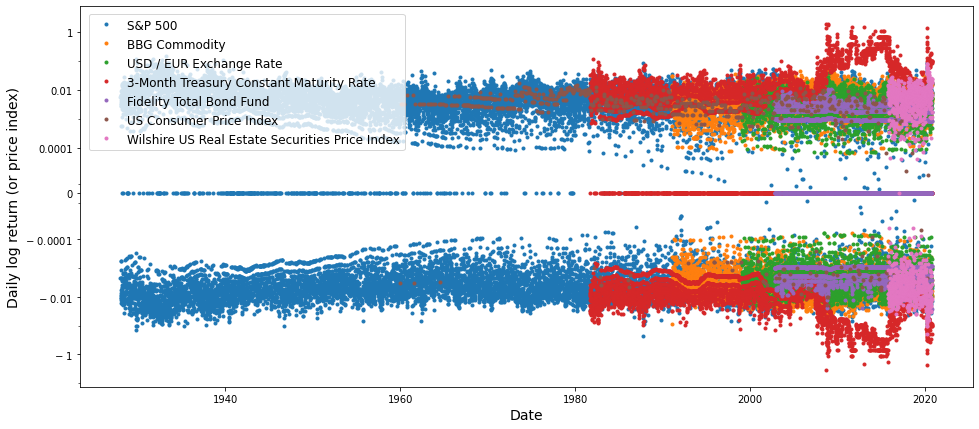

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numbers import Number

FONTSIZE = 14
FONTSIZE_LEGEND = 12
DISPLAY_MARGIN_RATIO = 5
YTIC_VALUES = [1, 1e-2, 1e-4, 0, -1e-4, -1e-2, -1]


def df_numbers_min_pos_max_neg(df):
    """The smallest positive and the highest negative number from the provided dataframe"""
    assert isinstance(df, pd.DataFrame), 'Input has to be a dataframe'
    
    min_pos = None  # lowest positive value
    max_neg = None  # highest negative value
    for _, column_values in df.iteritems():
        column_values_positive = [x for x in column_values if isinstance(x, Number) and x > 0.0]
        column_values_negative = [x for x in column_values if isinstance(x, Number) and x < 0.0]
        if len(column_values_positive) > 0:
            min_pos = min(column_values_positive) if min_pos is None else min(min(column_values_positive), min_pos)
        if len(column_values_negative) > 0:
            max_neg = max(column_values_negative) if max_neg is None else max(max(column_values_negative), max_neg)
        
    return min_pos, max_neg


def plot_selected_data_symlog_y(df=None, ytic_values=[]):
    """Plot the selected financial data sets with symmetric log y axis"""
    if df is not None:
        min_pos, max_neg = df_numbers_min_pos_max_neg(df)
        
        for data_set_name in df.columns:
            normalization = 0.01 if data_set_name == 'US Consumer Price Index' else 1.0
            plt.plot(normalization * df[data_set_name], lw=0, marker='.', label=data_set_name)
        plt.yscale('symlog', linthresh=max(-max_neg, min_pos) * DISPLAY_MARGIN_RATIO)
        plt.xlabel('Date', fontsize=FONTSIZE)
        plt.ylabel('Daily log return (or price index)', fontsize=FONTSIZE)
        plt.yticks(ytic_values, [str(y).replace('-', '$-\ $') for y in ytic_values])
        plt.legend(bbox_to_anchor=(0.01, .98), loc=2, borderaxespad=0., fontsize=FONTSIZE_LEGEND)
        
        fig = plt.gcf()
        fig.set_size_inches([16, 7])
        plt.show()


plot_selected_data_symlog_y(df_all, ytic_values=YTIC_VALUES)

###### Correlation matrix of the daily (monthly) data sets

* Explain values: group by magnitude the correlation values
* Note: the correlation matrix is symmetric

In [3]:
df_all_corr = df_all.corr()
display(df_all_corr.round(3))

,S&P 500,BBG Commodity,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,Fidelity Total Bond Fund,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
S&P 500,1.000,0.218,0.048,0.056,-0.140,0.100,0.759
BBG Commodity,0.218,1.000,0.271,0.021,0.006,0.236,0.287
USD / EUR Exchange Rate,0.048,0.271,1.000,0.025,0.124,-0.036,0.034
3-Month Treasury Constant Maturity Rate,0.056,0.021,0.025,1.000,-0.024,-0.144,0.185
Fidelity Total Bond Fund,-0.140,0.006,0.124,-0.024,1.000,-0.221,0.200
US Consumer Price Index,0.100,0.236,-0.036,-0.144,-0.221,1.000,0.460
Wilshire US Real Estate Securities Price Index,0.759,0.287,0.034,0.185,0.200,0.460,1.000


### Aggregate the indexes yearly

###### Aggregate the data


In [4]:
import pandas as pd


def aggregate_indexes_yearly(df_all=None):
    """Aggregate daily log returns (or monthly price index values) to yearly values.

       For all data sets other than inflation (price index): 
       - account for nans by scaling up with sqrt of time,
       - it is assumed that for each calendar there is a value (either a known value or a nan)."""

    df_all_yearly = pd.DataFrame()
    df_current_yearly = pd.DataFrame()
    for data_set_name in df_all.columns:
        years = df_all[data_set_name].index.year
        if data_set_name == 'US Consumer Price Index':
            df_current_yearly = pd.DataFrame(df_all[data_set_name].groupby(years).agg('mean'))
        else:
            sum_of_values = df_all[data_set_name].groupby(years).agg('sum')
            number_of_known_values = df_all[data_set_name].groupby(years).agg('count')
            number_of_nans = df_all[data_set_name].isnull().groupby(years).agg('sum').astype(int)
            df_current_yearly = pd.DataFrame(np.sqrt(1.0 + number_of_nans / number_of_known_values) * sum_of_values)

        df_current_yearly.columns = [data_set_name]
        df_all_yearly = (df_current_yearly.copy() if len(df_all_yearly.columns) == 0 
                         else pd.concat([df_all_yearly, df_current_yearly], axis=1))

    df_all_yearly.dropna(how='all', inplace=True)
    return df_all_yearly


df_all_yearly = aggregate_indexes_yearly(df_all=df_all)
display(df_all_yearly.round(3))

,S&P 500,BBG Commodity,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,Fidelity Total Bond Fund,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
1928,0.321,NaN,NaN,NaN,NaN,NaN,NaN
1929,-0.127,NaN,NaN,NaN,NaN,NaN,NaN
1930,-0.335,NaN,NaN,NaN,NaN,NaN,NaN
1931,-0.636,NaN,NaN,NaN,NaN,NaN,NaN
1932,-0.160,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016,0.093,0.110,0.009,0.660,0.026,0.171,-0.007
2017,0.182,0.008,0.116,0.843,0.012,0.174,-0.010
2018,-0.066,-0.143,-0.038,0.472,-0.039,0.158,-0.128
2019,0.260,0.054,-0.004,-0.508,0.065,0.189,0.249


###### Plot the aggregated data

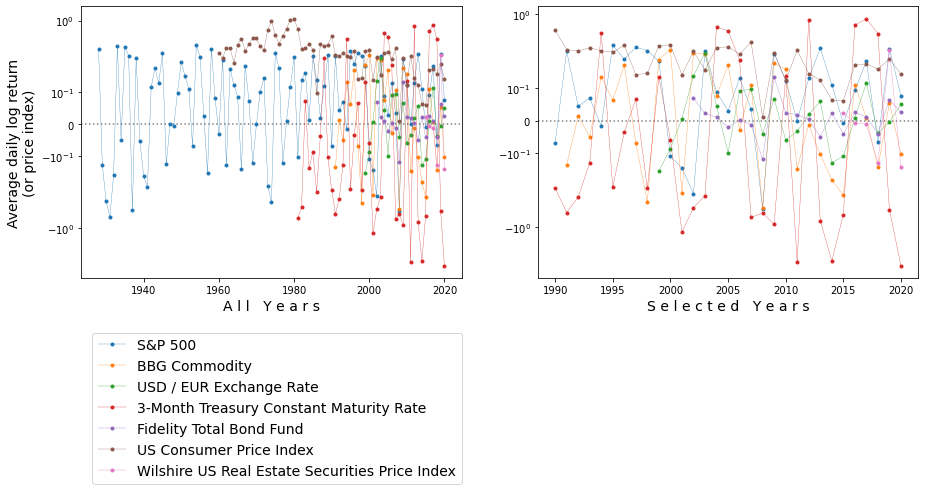

In [5]:
import matplotlib.pyplot as plt

FONTSIZE = 14
TICKS_FONTSIZE = 12
DISPLAY_MARGIN_RATIO = 5
YTIC_VALUES = [1, 0.1, 0, -0.1, -1]
LINTHRESH_Y = 0.2
SELECTED_MIN_YEAR = 1990


def plot_yearly_aggregated_data_symlog_y(df_all_yearly=None, ytic_values=[]):

    if df_all_yearly is not None:
        fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
        for xtick_ytick in ['xtick', 'ytick']:
            plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

        # all years
        ax = axes[0]
        ax.set_xlabel('A l l   Y e a r s', fontsize=FONTSIZE)
        ax.set_ylabel('Average daily log return\n(or price index)', fontsize=FONTSIZE)
        ax.set_yticks(ytic_values)
        ax.set_yticklabels([str(y).replace('-', '$-\ $') for y in ytic_values])
        ax.axhline(0, c='gray', ls='dotted')
        for data_set_name in df_all_yearly.columns:
            ax.set_yscale('symlog', linthresh=LINTHRESH_Y)
            ax.plot(df_all_yearly[data_set_name], '.-', linewidth=0.3, label=data_set_name)
            ax.legend(bbox_to_anchor=(1, -0.2), loc=0, borderaxespad=0, fontsize=FONTSIZE)

        # selected years
        df_all_yearly_sel = df_all_yearly[SELECTED_MIN_YEAR <= df_all_yearly.index]
        ax = axes[1]
        ax.set_xlabel('S e l e c t e d   Y e a r s', fontsize=FONTSIZE)
        ax.axhline(0, c='gray', ls='dotted')
        for data_set_name in df_all_yearly_sel.columns:
            ax.set_yscale('symlog', linthresh=LINTHRESH_Y)
            ax.plot(df_all_yearly_sel[data_set_name], '.-', linewidth=0.3)
            
        plt.show()
        

plot_yearly_aggregated_data_symlog_y(df_all_yearly=df_all_yearly, ytic_values=YTIC_VALUES)

###### Correlation matrix of the yearly aggregated data

In [6]:
df_all_yearly_corr = df_all_yearly.corr()
print('Correlation matrix using all data points (already seen above, shown here for comparison only)')
display(df_all_corr.round(3))
print('\nCorrelation matrix using yearly aggregated data')
display(df_all_yearly_corr.round(3))

Correlation matrix using all data points (already seen above, shown here for comparison only)


,S&P 500,BBG Commodity,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,Fidelity Total Bond Fund,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
S&P 500,1.000,0.218,0.048,0.056,-0.140,0.100,0.759
BBG Commodity,0.218,1.000,0.271,0.021,0.006,0.236,0.287
USD / EUR Exchange Rate,0.048,0.271,1.000,0.025,0.124,-0.036,0.034
3-Month Treasury Constant Maturity Rate,0.056,0.021,0.025,1.000,-0.024,-0.144,0.185
Fidelity Total Bond Fund,-0.140,0.006,0.124,-0.024,1.000,-0.221,0.200
US Consumer Price Index,0.100,0.236,-0.036,-0.144,-0.221,1.000,0.460
Wilshire US Real Estate Securities Price Index,0.759,0.287,0.034,0.185,0.200,0.460,1.000



Correlation matrix using yearly aggregated data


,S&P 500,BBG Commodity,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,Fidelity Total Bond Fund,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
S&P 500,1.000,0.258,0.176,0.098,0.483,-0.187,0.725
BBG Commodity,0.258,1.000,0.250,0.336,0.690,0.671,0.366
USD / EUR Exchange Rate,0.176,0.250,1.000,0.114,0.317,0.106,-0.129
3-Month Treasury Constant Maturity Rate,0.098,0.336,0.114,1.000,-0.139,0.168,0.297
Fidelity Total Bond Fund,0.483,0.690,0.317,-0.139,1.000,0.420,0.567
US Consumer Price Index,-0.187,0.671,0.106,0.168,0.420,1.000,0.218
Wilshire US Real Estate Securities Price Index,0.725,0.366,-0.129,0.297,0.567,0.218,1.000


### Correlation depends on aggregation length
#### Task: Observe changes and try to explain

In [7]:
diff_abs = df_all_yearly_corr - df_all_corr
print('\nDifference:  Correlation using yearly aggregated values  -  Correlation using all values')
display(diff_abs.round(1))


Difference:  Correlation using yearly aggregated values  -  Correlation using all values


,S&P 500,BBG Commodity,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,Fidelity Total Bond Fund,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
S&P 500,0.0,0.0,0.1,0.0,0.6,-0.3,-0.0
BBG Commodity,0.0,0.0,-0.0,0.3,0.7,0.4,0.1
USD / EUR Exchange Rate,0.1,-0.0,0.0,0.1,0.2,0.1,-0.2
3-Month Treasury Constant Maturity Rate,0.0,0.3,0.1,0.0,-0.1,0.3,0.1
Fidelity Total Bond Fund,0.6,0.7,0.2,-0.1,0.0,0.6,0.4
US Consumer Price Index,-0.3,0.4,0.1,0.3,0.6,0.0,-0.2
Wilshire US Real Estate Securities Price Index,-0.0,0.1,-0.2,0.1,0.4,-0.2,0.0


## Basic (non-derivative) financial products by asset class

### Stocks (Equities)
A stock (equity investment) is a partial ownership of a commercial entity.

Net income/expenses arise from: (1) change in value while owning it (2) dividends (3) debts and liabilities.
<br/>
Here "net" means the sum of the listed items with their respective signs: plus sign for income, minus sign for expense.

###### Dividends

Dividends: payments to shareholders<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ show influence of dividend on share price</span>


###### Example: IBM split announced in the morning of Oct 08, 2020

[Announcement of IBM's spin-off company](https://newsroom.ibm.com/2020-10-08-IBM-To-Accelerate-Hybrid-Cloud-Growth-Strategy-And-Execute-Spin-Off-Of-Market-Leading-Managed-Infrastructure-Services-Unit) --> IBM stock price jumped (image source: Google) ![IBM stock price jumped from Oct 07 to Oct 08](./img/IBM-stock-2020-Oct-05-to-09.PNG "IBM stock price jumped from Oct 07 to Oct 08")



### Fixed income (Bonds)

Description at the US SEC (Securities and Exchanges Commission):<br/>
https://www.investor.gov/introduction-investing/investing-basics/investment-products/bonds-or-fixed-income-products/bonds

T-Bills (sometimes categorized under Cash):<br/>
Explain how they're quoted - https://www.newyorkfed.org/aboutthefed/fedpoint/fed07.html

Coupons vs Dividends: what are the differnces and similarities

###### Example: Discounting a fixed list of coupons


### FX

FX: Foreign Exchange

currencies, incl crypto


who wins, who loses


Compare autocorrelation length of FX with autocorrelation length of the other asset classes


Compare trading volumes of some asset classes, and within those some types of products

### Commodities

intro: https://global.pimco.com/en-gbl/resources/education/understanding-commodities

### Credit
https://www.investopedia.com/terms/c/credit_market.asp

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ Credit market vs Bonds</span>

### Real Estate

Wilshire Real Estate index, https://fred.stlouisfed.org/series/WILLRESIPR



### Infrastructure

## Constructing financial products with Derivatives

Futures, Forwards, Options, Swaps, ...

Put-Call parity

Greeks

Hedging with derivatives

## Derivative financial products

Each asset class has its own

Can combine asset classes


## Recommended

https://www.investopedia.com --> Equity, Commodity, Credit, FX, Derivatives